In [71]:
import requests
import pandas as pd 
import numpy as np
import re
import sys, getopt
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns

def load_csv_dataset(file_path):
    return pd.read_csv(file_path)

os.chdir('/Users/finneganlaister-smith/Downloads/DEV ENVIRONMENT/data-science-jupyter-template-main/footy_project_market_value_rankings')

os.getcwd()

'/Users/finneganlaister-smith/Downloads/DEV ENVIRONMENT/data-science-jupyter-template-main/footy_project_market_value_rankings'

In [ ]:
%matplotlib agg
#%matplotlib inline

## Above Intervals

In [ ]:
plot_Data_competitions = pd.read_csv('split_competitions_win_pct_mkt_value_diff_ABOVE_INTERVALS.csv')


In [ ]:
competition_dfs = {comp: df for comp, df in plot_Data_competitions.groupby('Competition')}


In [ ]:
aye = competition_dfs['World Cup Qualifiers, CONMEBOL']
aye[aye['average_mv_prediction_correct'] >= .5].sort_values('interval', ascending=True)

In [ ]:
df = competition_dfs['Nations League']
df = df.drop_duplicates(subset='average_mv_prediction_correct')
df.sort_values('average_mv_prediction_correct', ascending=False).head(60)

In [ ]:
# def plot_competition_data(subset, competition_name):
#     # Drop rows with NaN values in 'average_mv_prediction_correct'
#     subset = subset.dropna(subset=['average_mv_prediction_correct'])
    
#     plt.figure(figsize=(10, 6))
    
#     # Create the plot
#     plot = sns.lineplot(data=subset, x='interval', y='average_mv_prediction_correct', alpha=0.7)
    
#     # Highlight vertical bars where Y value is at or above 0.75
#     for _, row in subset.iterrows():
#         if row['average_mv_prediction_correct'] >= 0.75:
#             plt.axvspan(row['interval'] - 0.1, row['interval'] + 0.1, color='pink', alpha=0.3)
    
#     # Add scatter plot with conditional coloring
#     scatter = sns.scatterplot(
#         data=subset, 
#         x='interval', 
#         y='average_mv_prediction_correct', 
#         size='sample_size', 
#         legend=False, 
#         sizes=(20, 200),
#         hue=subset['average_mv_prediction_correct'] >= 0.75,  # Conditional coloring
#         palette={True: 'red', False: 'blue'}  # Colors for the condition
#     )
    
#     # Calculate the maximum sample size
#     max_sample_size = subset['sample_size'].max()
    
#     # Add text annotations for sample size with more aggressive logarithmically decreasing intervals
#     last_annotation_index = -np.inf
#     smallest_sample_sizes = subset.nsmallest(5, 'sample_size')
#     for i, row in subset.iterrows():
#         # Calculate the interval based on a more aggressive logarithm of the average_mv_prediction_correct
#         interval = int(1000 / (1 + 2 * np.log1p(row['average_mv_prediction_correct'])))
        
#         # Adjust interval based on sample size with multiple thresholds
#         if row['sample_size'] < 0.5 * max_sample_size:
#             interval *= 2  # Increase the interval when sample size is less than 50% of the max sample size
#         if row['sample_size'] < 0.2 * max_sample_size:
#             interval *= 2  # Further increase the interval when sample size is less than 20% of the max sample size
#         if row['sample_size'] < 0.1 * max_sample_size:
#             interval *= 2  # Further increase the interval when sample size is less than 10% of the max sample size
        
#         if i - last_annotation_index >= interval or row['sample_size'] in smallest_sample_sizes['sample_size'].values:
#             plt.text(row['interval'], row['average_mv_prediction_correct'] + 0.1, f'{int(row["sample_size"])}',
#                      horizontalalignment='center', size='small', color='black', weight='semibold', rotation=90)
#             last_annotation_index = i
    
#     # Add a legend for the sample size text
#     plt.text(0.05, 0.95, 'Sample Size', horizontalalignment='left', verticalalignment='top', 
#              transform=plt.gca().transAxes, size='medium', color='black', weight='semibold', rotation=0)
    
#     # Find the highest X value
#     max_x_value = subset['interval'].max()
#     max_x_row = subset[subset['interval'] == max_x_value].iloc[0]
#     max_x_y_value = max_x_row['average_mv_prediction_correct']
    
#     # Add text annotation for the highest X value
#     plt.text(max_x_value, max_x_y_value, f'Highest X: {max_x_value}', 
#              horizontalalignment='right', size='medium', color='red', weight='semibold')
    
#     # Set X axis to a logarithmic scale
#     plt.xscale('log')
    
#     # Set Y axis limits
#     plt.ylim(0, 1)
    
#     # Add more Y axis ticks
#     plt.yticks(np.arange(0, 1.1, 0.1))
    
#     # Add labels and title
#     plt.title(f"% of correctly predicted matches by difference in market value, {competition_name}")
#     plt.xlabel("Interval (log scale)")
#     plt.ylabel("Average MV Prediction Correct")
    
#     # Use a minimal theme
#     sns.despine()
    
#     # Display the plot
#     plt.show()
    
#     # Clear the current plot to free memory
#     plt.clf()

In [ ]:
def plot_competition_data(subset, competition_name):
    # Drop rows with NaN values in 'average_mv_prediction_correct'
    subset = subset.dropna(subset=['average_mv_prediction_correct'])
    
    plt.figure(figsize=(10, 6))
    
    # Create the plot
    plot = sns.lineplot(data=subset, x='interval', y='average_mv_prediction_correct', alpha=0.7)
    
    # Highlight vertical bars where Y value is at or above 0.75
    for _, row in subset.iterrows():
        if row['average_mv_prediction_correct'] >= 0.75:
            plt.axvspan(row['interval'] - 0.1, row['interval'] + 0.1, color='pink', alpha=0.3)
    
    # Add scatter plot with conditional coloring
    scatter = sns.scatterplot(
        data=subset, 
        x='interval', 
        y='average_mv_prediction_correct', 
        size='sample_size', 
        legend=False, 
        sizes=(20, 200),
        hue=subset['average_mv_prediction_correct'] >= 0.75,  # Conditional coloring
        palette={True: 'red', False: 'blue'}  # Colors for the condition
    )
    
    # Calculate the maximum sample size
    max_sample_size = subset['sample_size'].max()
    
    # Add text annotations for sample size with much larger intervals
    last_annotation_index = -np.inf
    smallest_sample_sizes = subset.nsmallest(5, 'sample_size')
    for i, row in subset.iterrows():
        # Calculate the interval based on a much larger base interval
        interval = int(3000 / (1 + 2 * np.log1p(row['average_mv_prediction_correct'])))
        
        # Adjust interval based on sample size with multiple thresholds
        if row['sample_size'] < 0.5 * max_sample_size:
            interval *= 2  # Increase the interval when sample size is less than 50% of the max sample size
        if row['sample_size'] < 0.2 * max_sample_size:
            interval *= 2  # Further increase the interval when sample size is less than 20% of the max sample size
        if row['sample_size'] < 0.1 * max_sample_size:
            interval *= 2  # Further increase the interval when sample size is less than 10% of the max sample size
        
        if i - last_annotation_index >= interval or row['sample_size'] in smallest_sample_sizes['sample_size'].values:
            plt.text(row['interval'], row['average_mv_prediction_correct'] + 0.1, f'{int(row["sample_size"])}',
                     horizontalalignment='center', size='small', color='black', weight='semibold', rotation=90)
            last_annotation_index = i
    
    # Add a legend for the sample size text
    plt.text(0.05, 0.95, 'Sample Size', horizontalalignment='left', verticalalignment='top', 
             transform=plt.gca().transAxes, size='medium', color='black', weight='semibold', rotation=0)
    
    # Find the highest X value
    max_x_value = subset['interval'].max()
    max_x_row = subset[subset['interval'] == max_x_value].iloc[0]
    max_x_y_value = max_x_row['average_mv_prediction_correct']
    
    # Add text annotation for the highest X value
    plt.text(max_x_value, max_x_y_value, f'Highest X: {max_x_value}', 
             horizontalalignment='right', size='medium', color='red', weight='semibold')
    
    # Set X axis to a logarithmic scale
    plt.xscale('log')
    
    # Set Y axis limits
    plt.ylim(0, 1)
    
    # Add more Y axis ticks
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    # Add labels and title
    plt.title(f"% of correctly predicted matches by difference in market value, {competition_name}", pad=20, loc='left')
    plt.xlabel("Interval (log scale)")
    plt.ylabel("Average MV Prediction Correct")
    
    # Use a minimal theme
    sns.despine()
    
    # Display the plot
    plt.show()
    
    # Clear the current plot to free memory
    plt.clf()

In [ ]:

number = -1
number = number + 1
keynum = list(competition_dfs.keys())[number]
plot_competition_data(competition_dfs[keynum], keynum)

## BELOW INTERVALS

In [ ]:
# def plot_competition_data_below(subset, competition_name):
#     # Drop rows with NaN values in 'average_mv_prediction_correct'
#     subset = subset.dropna(subset=['average_mv_prediction_correct'])
    
#     plt.figure(figsize=(10, 6))
    
#     # Create the plot
#     plot = sns.lineplot(data=subset, x='interval', y='average_mv_prediction_correct', alpha=0.7)
    
#     # Highlight vertical bars where Y value is at or above 0.75
#     for _, row in subset.iterrows():
#         # if row['average_mv_prediction_correct'] >= 0.75:
#         #     plt.axvspan(row['interval'] - 0.1, row['interval'] + 0.1, color='pink', alpha=0.3)
#         # Highlight areas where Y value is below 0.3
#         if row['average_mv_prediction_correct'] < 0.3:
#             plt.axvspan(row['interval'] - 0.1, row['interval'] + 0.1, color='lightpink', alpha=0.5)
    
#     # Add scatter plot with conditional coloring
#     scatter = sns.scatterplot(
#         data=subset, 
#         x='interval', 
#         y='average_mv_prediction_correct', 
#         size='sample_size', 
#         legend=False, 
#         sizes=(20, 200),
#         hue=subset['average_mv_prediction_correct'] <= 0.3,  # Conditional coloring
#         palette={True: 'red', False: 'blue'}  # Colors for the condition
#     )
    
#     # Calculate the maximum sample size
#     max_sample_size = subset['sample_size'].max()
#     threshold_sample_size = 0.1 * max_sample_size  # 10% of the maximum sample size
    
#     # Initialize the last annotated sample size
#     last_annotated_sample_size = None
    
#     # Add text annotations for points where sample size is below 10% of the maximum
#     for i, row in subset.iterrows():
#         if row['sample_size'] < threshold_sample_size:
#             if row['sample_size'] != last_annotated_sample_size:
#                 plt.text(row['interval'], row['average_mv_prediction_correct'] + 0.05, f'{int(row["sample_size"])}',
#                          horizontalalignment='center', size='small', color='black', weight='semibold', rotation=90)
#                 last_annotated_sample_size = row['sample_size']
    
#     # Find the lowest X value
#     min_x_value = subset['interval'].min()
#     min_x_row = subset[subset['interval'] == min_x_value].iloc[0]
#     min_x_y_value = min_x_row['average_mv_prediction_correct']
    
#     # Add text annotation for the lowest X value, moved down and to the left
#     plt.text(min_x_value, min_x_y_value - 0.05, f'Lowest X: {min_x_value}', 
#              horizontalalignment='left', size='medium', color='red', weight='semibold')
    
#     # Annotate the point where sample_size first reaches the maximum value
#     max_sample_size_row = subset[subset['sample_size'] == max_sample_size].iloc[0]
#     plt.text(max_sample_size_row['interval'], max_sample_size_row['average_mv_prediction_correct'] + 0.05, 
#              f'Max Sample Size: {int(max_sample_size_row["sample_size"])}', 
#              horizontalalignment='center', size='medium', color='green', weight='semibold')
    
#     # Set X axis to a logarithmic scale
#     plt.xscale('log')
    
#     # Set Y axis limits
#     plt.ylim(0, 1)
    
#     # Add more Y axis ticks
#     plt.yticks(np.arange(0, 1.1, 0.1))
    
#     # Add labels and title
#     plt.title(f"% of correctly predicted matches by difference in market value, {competition_name}", pad=20, loc='left')
#     plt.xlabel("Interval (log scale)")
#     plt.ylabel("Average MV Prediction Correct")
    
#     # Use a minimal theme
#     sns.despine()
    
#     # Display the plot
#     plt.show()
    
#     # Clear the current plot to free memory
#     plt.clf()

In [ ]:
def plot_competition_data_below(subset, competition_name, annotation_interval=20, secondary_annotation_interval=40):
    # Drop rows with NaN values in 'average_mv_prediction_correct'
    subset = subset.dropna(subset=['average_mv_prediction_correct'])
    
    plt.figure(figsize=(10, 6))
    
    # Create the plot
    plot = sns.lineplot(data=subset, x='interval', y='average_mv_prediction_correct', alpha=0.7)
    
    # Highlight vertical bars where Y value is at or above 0.75
    for _, row in subset.iterrows():
        if row['average_mv_prediction_correct'] >= 0.75:
            plt.axvspan(row['interval'] - 0.1, row['interval'] + 0.1, color='pink', alpha=0.3)
        # Highlight areas where Y value is below 0.3
        if row['average_mv_prediction_correct'] < 0.3:
            plt.axvspan(row['interval'] - 0.1, row['interval'] + 0.1, color='lightpink', alpha=0.5)
    
    # Add scatter plot with conditional coloring
    scatter = sns.scatterplot(
        data=subset, 
        x='interval', 
        y='average_mv_prediction_correct', 
        size='sample_size', 
        legend=False, 
        sizes=(20, 200),
        hue=subset['average_mv_prediction_correct'] <= 0.3,  # Conditional coloring
        palette={True: 'red', False: 'blue'}  # Colors for the condition
    )
    
    # Calculate the maximum sample size
    max_sample_size = subset['sample_size'].max()
    threshold_sample_size_low = 0.1 * max_sample_size  # 10% of the maximum sample size
    secondary_threshold_sample_size = 0.05 * max_sample_size  # 5% of the maximum sample size
    
    # Initialize the last annotated sample size and last annotated index
    last_annotation_index = -annotation_interval  # Ensure the first point can be annotated
    last_secondary_annotation_index = -secondary_annotation_interval  # For secondary threshold
    last_annotated_sample_size = None  # For tracking changes in sample size
    
    # Add text annotations for points where sample size is below 10% of the maximum
    for i, row in subset.iterrows():
        if row['sample_size'] < threshold_sample_size_low:
            if row['sample_size'] >= secondary_threshold_sample_size:
                # Annotate only if the sample size changes by at least 3
                if last_annotated_sample_size is None or abs(row['sample_size'] - last_annotated_sample_size) >= 3:
                    if i - last_secondary_annotation_index >= secondary_annotation_interval:
                        plt.text(row['interval'], row['average_mv_prediction_correct'] + 0.05, f'{int(row["sample_size"])}',
                                 horizontalalignment='center', size='small', color='black', weight='semibold', rotation=90)
                        last_secondary_annotation_index = i
                        last_annotated_sample_size = row['sample_size']
            else:
                if i - last_annotation_index >= annotation_interval:
                    plt.text(row['interval'], row['average_mv_prediction_correct'] + 0.05, f'{int(row["sample_size"])}',
                             horizontalalignment='center', size='small', color='black', weight='semibold', rotation=90)
                    last_annotation_index = i
    
    # Add annotation for sample size exactly at 10% of the maximum or the closest one
    ten_percent_sample_size = threshold_sample_size_low
    ten_percent_row = subset.iloc[(subset['sample_size'] - ten_percent_sample_size).abs().argsort()[:1]]
    if not ten_percent_row.empty:
        row = ten_percent_row.iloc[0]
        plt.text(row['interval'], row['average_mv_prediction_correct'] + 0.05, f'10% Max: {int(row["sample_size"])}',
                 horizontalalignment='center', size='small', color='purple', weight='semibold', rotation=90)

    # Find the lowest X value
    min_x_value = subset['interval'].min()
    min_x_row = subset[subset['interval'] == min_x_value].iloc[0]
    min_x_y_value = min_x_row['average_mv_prediction_correct']
    
    # Add text annotation for the lowest X value, moved down and to the left
    plt.text(min_x_value, min_x_y_value - 0.05, f'Lowest X: {min_x_value}', 
             horizontalalignment='left', size='medium', color='red', weight='semibold')
    
    # Annotate the point where sample_size first reaches the maximum value
    max_sample_size_row = subset[subset['sample_size'] == max_sample_size].iloc[0]
    plt.text(max_sample_size_row['interval'], max_sample_size_row['average_mv_prediction_correct'] + 0.05, 
             f'Max Sample Size: {int(max_sample_size_row["sample_size"])}', 
             horizontalalignment='center', size='medium', color='green', weight='semibold')
    
    # Set X axis to a logarithmic scale
    plt.xscale('log')
    
    # Set Y axis limits
    plt.ylim(0, 1)
    
    # Add more Y axis ticks
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    # Add labels and title
    plt.title(f"% of correctly predicted matches by difference in market value, {competition_name}", pad=20, loc='left')
    plt.xlabel("Interval (log scale)")
    plt.ylabel("Average MV Prediction Correct")
    
    # Use a minimal theme
    sns.despine()
    
    # Display the plot
    plt.show()
    
    # Clear the current plot to free memory
    plt.clf()

In [ ]:
plot_Data_competitions_below = pd.read_csv('split_competitions_win_pct_mkt_value_diff_BELOW_INTERVALS.csv')


In [ ]:
competition_dfs = {comp: df for comp, df in plot_Data_competitions_below.groupby('Competition')}


In [ ]:
aye = competition_dfs['World Cup Qualifiers, CONMEBOL']
aye[aye['average_mv_prediction_correct'] <= .51].sort_values('interval', ascending=False)

In [ ]:
aye = competition_dfs['World Cup Qualifiers, Africa']
aye[aye['average_mv_prediction_correct'] <= 0.45].sort_values('interval', ascending=False)

In [ ]:
number = -1
number = number + 1
keynum = list(competition_dfs.keys())[number]
plot_competition_data_below(competition_dfs[keynum], keynum)

## Finding threshold above which it's a lock

### from below

goal: find a MV difference with a significant sample size of matches below which the lower team Never wins.

In [ ]:

import numpy as np
import scipy.stats as stats
plot_Data_competitions_below = pd.read_csv('split_competitions_win_pct_mkt_value_diff_BELOW_INTERVALS.csv')
competition_dfs_below = {comp: df for comp, df in plot_Data_competitions_below.groupby('Competition')}
    
plot_Data_competitions_above = pd.read_csv('split_competitions_win_pct_mkt_value_diff_ABOVE_INTERVALS.csv')
competition_dfs_above = {comp: df for comp, df in plot_Data_competitions_above.groupby('Competition')}


In [ ]:
number = -1
number = number +1


In [ ]:
keynum = list(competition_dfs_above.keys())[number]
df = competition_dfs_above[keynum]
minsample = df['sample_size'].min() + 1
minsample_df = df[df['sample_size'] == minsample]

df = df.dropna(subset=['average_mv_prediction_correct'])
idx = df.groupby(['average_mv_prediction_correct', 'sum_mv_prediction_correct', 'sample_size'])['interval'].idxmax()
df_high = df.loc[idx]
#df_high = df[df['average_mv_prediction_correct'] >= 0.45]
df_high = df_high[df_high['interval'] <= minsample_df['interval'].max()]
df_high = df_high.sort_values('interval')
# Use the indices to select the rows from the original DataFrame
competition_this = df['Competition'].unique()[0]
samplesize = df['sample_size'].max()
max_interval_competition = minsample_df['interval'].min()
print('competition: ', competition_this)
print('sample size: ', samplesize)
print('max interval in this competition: ', max_interval_competition)


In [ ]:
keynum = list(competition_dfs_below.keys())[number]
df = competition_dfs_below[keynum]
maxsample = df['sample_size'].max()
maxsample_df = df[df['sample_size'] == maxsample]
df = df.dropna(subset=['average_mv_prediction_correct'])
idx = df.groupby(['average_mv_prediction_correct', 'sum_mv_prediction_correct', 'sample_size'])['interval'].idxmin()
df_low = df.loc[idx]
df_low = df_low[df_low['interval'] <= maxsample_df['interval'].min()]
df_low = df_low.sort_values('interval')

In [ ]:
number_high_side_above_70_pct = df_high[df_high['average_mv_prediction_correct'] >= 0.7]['sample_size'].max()
number_low_side_below_30_pct = df_low[df_low['average_mv_prediction_correct'] <= 0.3]['sample_size'].max()
tossup_pct_df_high = df_high[(0.45 <= df_high['average_mv_prediction_correct']) & (df_high['average_mv_prediction_correct'] <= 0.55)].sort_values('sample_size')#['sample_size'].max()
tossup_pct_df_low = df_low[(0.45 <= df_low['average_mv_prediction_correct']) & (df_low['average_mv_prediction_correct'] <= 0.55)].sort_values('sample_size')#['sample_size'].max()
percentage_number_high_side_70_pct = round((number_high_side_above_70_pct / df_high['sample_size'].max()) * 100, 2)
percentange_number_low_side_30_pct = round((number_low_side_below_30_pct / df_high['sample_size'].max()) * 100, 2)
print(f"counting the matches with the {number_high_side_above_70_pct} ({percentage_number_high_side_70_pct}%)largest MV differences the win % of the team with the higher MV is ≥70%"),
print(f"counting the matches with the {number_low_side_below_30_pct} ({percentange_number_low_side_30_pct}%) smallest MV differences the win % of the team with the higher MV is below 30%")

In [ ]:
mean = tossup_pct_df_high['sample_size'].mean()
std_dev = tossup_pct_df_high['sample_size'].std()
lower_bound = max(mean - 1.96 * std_dev, tossup_pct_df_high['sample_size'].min())
upper_bound = min(mean + 1.96 * std_dev, tossup_pct_df_high['sample_size'].max())
print(f"when you count up to {tossup_pct_df_high['sample_size'].max()} matches the % of times when the higher team wins falls in the tossup range (which is when the of % of Matches where the team with higher MV won the match is between 45% and 55%) \n 2 standard deviations (95%) of the time when it falls in the tossup range are when you count between {lower_bound:.2f} and {upper_bound:.2f} of the matches")

In [ ]:
lower_percentile = np.percentile(tossup_pct_df_high['interval'], 5)
upper_percentile = np.percentile(tossup_pct_df_high['interval'], 95)
print(f"90% of the samples where the win rate of the higher MV teams fell into the tossup range, \nthe sample included matches of MV differences between {lower_percentile:.2f} and {tossup_pct_df_high['interval'].max()}, and {upper_percentile:.2f} and {tossup_pct_df_high['interval'].max()}.")
print(f'the min interval you could count matches of that MV difference or above, where the overall win pct of the higher value team, was {tossup_pct_df_high['interval'].min()}')
mean = tossup_pct_df_high['interval'].mean()
std_dev = tossup_pct_df_high['interval'].std()
median = np.median(tossup_pct_df_high['interval'])
q20, q80 = np.percentile(tossup_pct_df_high['interval'], [20, 80])
iqr = q80 - q20
print(f"Mean MV difference interval we started counting from where the higher value team won at beetween 45% and 55%: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"20th percentile of where you can filter matches at: {q20:.2f}, 80th percentile: {q80:.2f}, IQR: {iqr:.2f}")

In [ ]:
max_below_sample_size_below_50_pct_win_rate = tossup_pct_df_low[tossup_pct_df_low['average_mv_prediction_correct'] <= .50]['sample_size'].max()
max_difference = tossup_pct_df_low[tossup_pct_df_low['average_mv_prediction_correct'] <= .50]['interval'].max()
max_below_sample_size_below_50_pct_win_rate
#how many matches can you include on the below graph in the sample size where the average mv prediction correct is ≤50
print(f'you can include {max_below_sample_size_below_50_pct_win_rate} ({max_below_sample_size_below_50_pct_win_rate/tossup_pct_df_low['sample_size'].max()}) of the matches with the smallest differences in market value, including all matches up to a difference of {max_difference}, before the average win rate of the higher value team gets to 50%')

In [ ]:
#next step

#you need liek the derivatives of these graphs

#as the MV is getting higher whats the rate of the change fo the win rate 

### loop script

In [ ]:
# Loop through the keys
results_df = pd.DataFrame()

for number in range(15):
    keynum = list(competition_dfs_above.keys())[number]
    df = competition_dfs_above[keynum]
    minsample = df['sample_size'].min() + 1
    minsample_df = df[df['sample_size'] == minsample]

    df = df.dropna(subset=['average_mv_prediction_correct'])
    idx = df.groupby(['average_mv_prediction_correct', 'sum_mv_prediction_correct', 'sample_size'])['interval'].idxmax()
    df_high = df.loc[idx]
    df_high = df_high[df_high['interval'] <= minsample_df['interval'].max()]
    df_high = df_high.sort_values('interval')

    competition_this = df['Competition'].unique()[0]
    samplesize = df['sample_size'].max()
    max_interval_competition = minsample_df['interval'].min()
    #print('competition: ', competition_this)
    #print('sample size: ', samplesize)
    #print('max interval in this competition: ', max_interval_competition)

    df = competition_dfs_below[keynum]
    maxsample = df['sample_size'].max()
    maxsample_df = df[df['sample_size'] == maxsample]
    df = df.dropna(subset=['average_mv_prediction_correct'])
    idx = df.groupby(['average_mv_prediction_correct', 'sum_mv_prediction_correct', 'sample_size'])['interval'].idxmin()
    df_low = df.loc[idx]
    df_low = df_low[df_low['interval'] <= maxsample_df['interval'].min()]
    df_low = df_low.sort_values('interval')

    number_high_side_above_70_pct = df_high[df_high['average_mv_prediction_correct'] >= 0.7]['sample_size'].max()
    number_low_side_below_30_pct = df_low[df_low['average_mv_prediction_correct'] <= 0.3]['sample_size'].max()
    tossup_pct_df_high = df_high[(0.45 <= df_high['average_mv_prediction_correct']) & (df_high['average_mv_prediction_correct'] <= 0.55)].sort_values('sample_size')
    tossup_pct_df_low = df_low[(0.45 <= df_low['average_mv_prediction_correct']) & (df_low['average_mv_prediction_correct'] <= 0.55)].sort_values('sample_size')
    percentage_number_high_side_70_pct = round(number_high_side_above_70_pct/df_high['sample_size'].max(), 4)#round((number_high_side_above_70_pct / df_high['sample_size'].max()) * 100, 2)
    percentange_number_low_side_30_pct = round((number_low_side_below_30_pct / df_high['sample_size'].max()) * 100, 2)
    #print(f"counting the matches with the {number_high_side_above_70_pct} ({percentage_number_high_side_70_pct}%) largest MV differences the win % of the team with the higher MV is ≥70%. That includes differences above {df_high[df_high['average_mv_prediction_correct'] >= 0.7]['interval'].min()}")
    #print(f"counting the matches with the {number_low_side_below_30_pct} ({percentange_number_low_side_30_pct}%) smallest MV differences the win % of the team with the higher MV is below 30%. That includes differences above {df_low[df_low['average_mv_prediction_correct'] <= 0.3]['interval'].max()}")

    mean = tossup_pct_df_high['sample_size'].mean()
    std_dev = tossup_pct_df_high['sample_size'].std()
    lower_bound = max(mean - 1.96 * std_dev, tossup_pct_df_high['sample_size'].min())
    upper_bound = min(mean + 1.96 * std_dev, tossup_pct_df_high['sample_size'].max())
    #print(f"when you count up to {tossup_pct_df_high['sample_size'].max()} matches the % of times when the higher team wins falls in the tossup range (which is when the of % of Matches where the team with higher MV won the match is between 45% and 55%) \n 2 standard deviations (95%) of the time when it falls in the tossup range are when you count between {lower_bound:.2f} and {upper_bound:.2f} of the matches")

    if (len(tossup_pct_df_high)) == 0:
        lower_percentile = 0
        upper_percentile = 0
    else:
        lower_percentile = np.percentile(tossup_pct_df_high['interval'], 5)
        upper_percentile = np.percentile(tossup_pct_df_high['interval'], 95)
        mean = tossup_pct_df_high['interval'].mean()
        std_dev = tossup_pct_df_high['interval'].std()
        median = np.median(tossup_pct_df_high['interval'])
        q20, q80 = np.percentile(tossup_pct_df_high['interval'], [20, 80])
        iqr = q80 - q20
    #print(f"90% of the samples where the win rate of the higher MV teams fell into the tossup range, \nthe sample included matches of MV differences between {lower_percentile:.2f} and {tossup_pct_df_high['interval'].max()}, and {upper_percentile:.2f} and {tossup_pct_df_high['interval'].max()}.")
    #print(f'the min interval you could count matches of that MV difference or above, where the overall win pct of the higher value team, was {tossup_pct_df_high['interval'].min()}')
    #print(f"Mean MV difference interval we started counting from where the higher value team won at beetween 45% and 55%: {mean:.2f}")
    #print(f"Median: {median:.2f}")
    #print(f"20th percentile of where you can filter matches at: {q20:.2f}, 80th percentile: {q80:.2f}, IQR: {iqr:.2f}")

    max_below_sample_size_below_50_pct_win_rate = tossup_pct_df_low[tossup_pct_df_low['average_mv_prediction_correct'] <= .50]['sample_size'].max()
    max_difference = tossup_pct_df_low[tossup_pct_df_low['average_mv_prediction_correct'] <= .50]['interval'].max()
    #print(f'you can include {max_below_sample_size_below_50_pct_win_rate} ({max_below_sample_size_below_50_pct_win_rate/tossup_pct_df_low['sample_size'].max()}) of the matches with the smallest differences in market value, including all matches up to a difference of {max_difference}, before the average win rate of the higher value team gets to 50%')

    #print(percentage_number_high_side_70_pct)
    new_row = {
        'Competition': competition_this,
        'Sample Size (matches)': samplesize, 
        'Largest Interval in Competition': max_interval_competition,
        '# of largest differences matches with combined more valuable team win pct of ≥70': number_high_side_above_70_pct,
        'Pct of largest differences matches with combined more valuable team win pct of ≥70': number_high_side_above_70_pct/df_high['sample_size'].max(), 
        'Difference above which win pct of more valuable team is ≥70': df_high[df_high['average_mv_prediction_correct'] >= 0.7]['interval'].min(),
        '# of smallest differences matches with combined more valuable team win pct of ≤30': number_low_side_below_30_pct,
        'Pct of smallest differences matches with combined more valuable team win pct of ≤30': percentange_number_low_side_30_pct,
        'Difference below which win pct of more valuable team is ≤30': df_low[df_low['average_mv_prediction_correct'] <= 0.3]['interval'].max(),
        'Highest # of matches in sample when among X matches with the highest difference in MV, the combined winpct of more valuable team is 45-55': tossup_pct_df_high['sample_size'].max(),
        '% matches in sample when among X% of matches with the highest difference in MV, the combined winpct of more valuable team is 45-55': tossup_pct_df_high['sample_size'].max() / df_high['sample_size'].max(),
        'Min Interval you can count matches of that MV difference or above where the ovall win pct of the higher value team was 45-55%': tossup_pct_df_high['interval'].min(),
        'Min # of matches above 50pct of the sample size where amongst the group of matches the more valuable team win pct is 45-55%': tossup_pct_df_high[tossup_pct_df_high['sample_size'] >= tossup_pct_df_high['sample_size'].max() / 2]['sample_size'].min(),
        'Highest # where in all matches with a MV difference of X or higher the win pct of the more valuable team is 45-55%': tossup_pct_df_high[tossup_pct_df_high['sample_size'] >= tossup_pct_df_high['sample_size'].max() / 2]['interval'].max(),
        'Largest sample size where amongst X matches with lowest MV difference the win rate of higher value team is 45-55%': tossup_pct_df_low['sample_size'].max(),
        '% of matches such that the X% of matches with lowest MV difference the win rate of higher value team is 45-55%': tossup_pct_df_low['sample_size'].max() / df_low['sample_size'].max(),
        '# of lowest MV difference matches in sample before combined win rate of higher value team is above 50%': max_below_sample_size_below_50_pct_win_rate,
        'Pct of lowest MV difference matches in sample before combined win rate of higher value team is above 50%': max_below_sample_size_below_50_pct_win_rate/tossup_pct_df_low['sample_size'].max(),
        'Largest interval where among all matches of X MV difference or below the win pct of higher value team is below 50%': max_difference
    }
    new_row_df = pd.DataFrame([new_row])
    results_df = pd.concat([results_df, new_row_df], ignore_index=True)
results_df

#to fix - why is the Pct column stuck at 4.55. it should be 0.1545

In [ ]:
126/266

In [ ]:
max_below_sample_size_below_50_pct_win_rate, tossup_pct_df_low['sample_size'].max()

In [ ]:
df_high[df_high['average_mv_prediction_correct'] >= 0.7]['interval'].min()

# PLOTTNG WHEN THE LESS VALUABLE TEAM WINS

In [16]:
overall_data_inverted_above = load_csv_dataset('Analysis_Q1/WIN PCT OF LESS VALUABLE TEAM BY MV DIFFERENCE/INVERTED All Data - Above Intervals.csv')
overall_data_inverted_below = load_csv_dataset('Analysis_Q1/WIN PCT OF LESS VALUABLE TEAM BY MV DIFFERENCE/INVERTED All Data - Below Intervals.csv')

## Above Intervals - INVERTED

In [72]:
plot_Data_competitions = pd.read_csv('Analysis_Q1/Winpct of less valuable team by MV difference interval/INVERTED - All Data - BY COMPETITION - Above Intervals.csv')
competition_dfs = {comp: df for comp, df in plot_Data_competitions.groupby('Competition')}


In [80]:
def plot_competition_data_inverted_above(subset, competition_name):
    # Drop rows with NaN values in 'average_mv_prediction_correct'
    subset = subset.dropna(subset=['average_mv_prediction_correct'])
    
    plt.figure(figsize=(10, 6))
    
    # Modify the data for plotting
    subset['inverse_mv_prediction_correct'] = subset['average_mv_prediction_correct']
    
    # Create the plot
    plot = sns.lineplot(data=subset, x='interval', y='inverse_mv_prediction_correct', alpha=0.7)
    
    # Highlight vertical bars where Y value is at or above 0.25 (1 - 0.75)
    for _, row in subset.iterrows():
        if row['inverse_mv_prediction_correct'] <= 0.1:
            plt.axvspan(row['interval'] - 0.1, row['interval'] + 0.1, color='pink', alpha=0.3)
    
    # Add scatter plot with conditional coloring
    scatter = sns.scatterplot(
        data=subset, 
        x='interval', 
        y='inverse_mv_prediction_correct', 
        size='sample_size', 
        legend=False, 
        sizes=(20, 200),
        hue=subset['inverse_mv_prediction_correct'] <= 0.1,  # Conditional coloring
        palette={True: 'red', False: 'blue'}  # Colors for the condition
    )
    
    # Calculate the maximum sample size
    max_sample_size = subset['sample_size'].max()
    
    # Add text annotations for sample size with much larger intervals
    last_annotation_index = -np.inf
    smallest_sample_sizes = subset.nsmallest(5, 'sample_size')
    for i, row in subset.iterrows():
        # Calculate the interval based on a much larger base interval
        interval = int(3000 / (1 + 2 * np.log1p(row['inverse_mv_prediction_correct'])))
        
        # Adjust interval based on sample size with multiple thresholds
        if row['sample_size'] < 0.5 * max_sample_size:
            interval *= 2  # Increase the interval when sample size is less than 50% of the max sample size
        if row['sample_size'] < 0.2 * max_sample_size:
            interval *= 2  # Further increase the interval when sample size is less than 20% of the max sample size
        if row['sample_size'] < 0.1 * max_sample_size:
            interval *= 2  # Further increase the interval when sample size is less than 10% of the max sample size
        
        if i - last_annotation_index >= interval or row['sample_size'] in smallest_sample_sizes['sample_size'].values:
            plt.text(row['interval'], row['inverse_mv_prediction_correct'] + 0.1, f'{int(row["sample_size"])}',
                     horizontalalignment='center', size='small', color='black', weight='semibold', rotation=90)
            last_annotation_index = i
    
    # Add a legend for the sample size text
    plt.text(0.05, 0.95, 'Sample Size', horizontalalignment='left', verticalalignment='top', 
             transform=plt.gca().transAxes, size='medium', color='black', weight='semibold', rotation=0)
    
    # Find the highest X value
    max_x_value = subset['interval'].max()
    max_x_row = subset[subset['interval'] == max_x_value].iloc[0]
    max_x_y_value = max_x_row['inverse_mv_prediction_correct']
    
    # Add text annotation for the highest X value
    plt.text(max_x_value, max_x_y_value, f'Highest X: {max_x_value}', 
             horizontalalignment='right', size='medium', color='red', weight='semibold')
    
    # Set X axis to a logarithmic scale
    plt.xscale('log')
    
    # Set Y axis limits
    plt.ylim(0, 1)
    
    # Add more Y axis ticks
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    # Add labels and title
    plt.title(f"% of matches won by the less valuable team by difference in market value, {competition_name}", pad=20, loc='left')
    plt.xlabel("Interval (log scale)")
    plt.ylabel("Percentage of Less Valuable Team Winning")
    
    # Use a minimal theme
    sns.despine()
    
    # Display the plot
    #plt.show()
    plt.savefig(f'/Users/finneganlaister-smith/Downloads/PLOTS % LESS VALUABLE TEAM WINS/ABOVE INTERVALS/{keynum}.png')
    # Clear the current plot to free memory
    plt.clf()

In [76]:
def plot_mv_predictions_inverted(data):
    plt.figure(figsize=(10, 6))
    
    # Calculate the threshold for 20% of 5319
    threshold_sample_size = 0.2 * 5319
    
    # Find the first interval where the sample size is less than or equal to the threshold
    threshold_data = data[data['sample_size'] <= threshold_sample_size]
    if not threshold_data.empty:
        threshold_interval = threshold_data['interval'].min()
        threshold_sample_size_actual = threshold_data[threshold_data['interval'] == threshold_interval]['sample_size'].iloc[0]
        # Plot the data
        plt.plot(data['interval'], data['average_mv_prediction_correct'], marker='o', linestyle='-')
        
        # Plot a vertical line at the threshold interval
        plt.axvline(x=threshold_interval, color='red', linestyle='--', label=f'MV Diff, top 20% of games: {threshold_interval}')
    
        # Add text annotation for the sample size at the threshold
        plt.text(threshold_interval, 0.25, f'Top 20% ({int(threshold_sample_size_actual)})', 
                 verticalalignment='bottom', horizontalalignment='right', rotation=90, color='red')
    else:
        plt.plot(data['interval'], data['average_mv_prediction_correct'], marker='o', linestyle='-')
        plt.text(data['interval'].min(), 0.02, 'No data below threshold', verticalalignment='bottom', color='red')
    
    plt.title('Market Value Prediction Accuracy by Interval')
    plt.xlabel('Interval')
    plt.ylabel('Average MV Prediction Correct')
    plt.xscale('log')  # Set the X-axis to a logarithmic scale
    plt.ylim(0, 1)  # Set the Y-axis limits from 0 to 1
    plt.legend()
    plt.grid(True)
    plt.show()

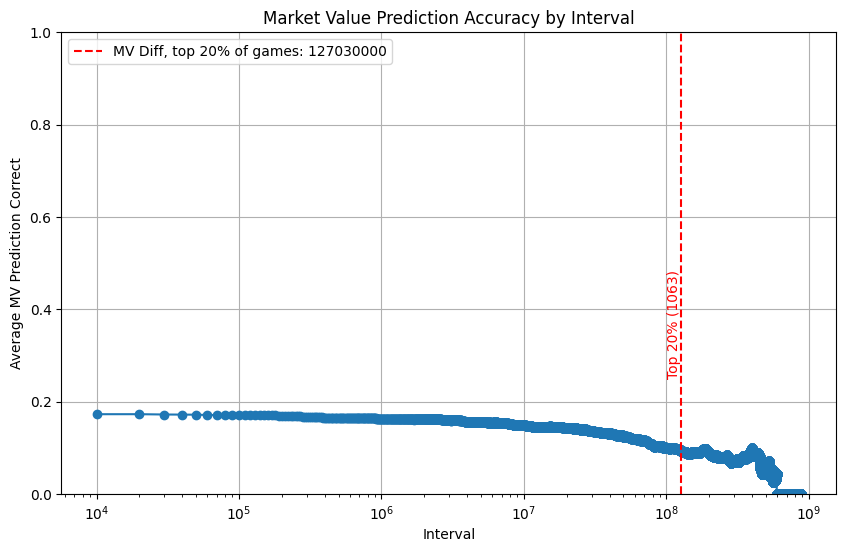

In [57]:
#for overall data - above - DONE
overall_data_plot_above_ints = plot_mv_predictions_inverted(overall_data_inverted_above)

In [ ]:
#for each competition

#number = -1
while number <= 14:
    number = number + 1
    keynum = list(competition_dfs.keys())[number]
    plot_competition_data_inverted_above(competition_dfs[keynum], keynum)

## INVERTED - BELOW INTERVALS

In [95]:
plot_Data_competitions_below = pd.read_csv('Analysis_Q1/Winpct of less valuable team by MV difference interval/INVERTED - All Data - BY COMPETITION - Below Intervals.csv')
competition_dfs = {comp: df for comp, df in plot_Data_competitions_below.groupby('Competition')}


In [98]:
def plot_mv_predictions_inverted_below(data):
    plt.figure(figsize=(10, 6))
    
    # Calculate the threshold for 20% of 5319
    threshold_sample_size = 0.2 * 5319
    
    # Find the first interval where the sample size is less than or equal to the threshold
    threshold_data = data[data['sample_size'] <= threshold_sample_size]
    if not threshold_data.empty:
        threshold_interval = threshold_data['interval'].max()
        threshold_sample_size_actual = threshold_data[threshold_data['interval'] == threshold_interval]['sample_size'].iloc[0]
    
        # Plot the data
        plt.plot(data['interval'], data['average_mv_prediction_correct'], marker='o', linestyle='-')
        
        # Plot a vertical line at the threshold interval
        plt.axvline(x=threshold_interval, color='red', linestyle='--', label=f'MV diff, bottom 20% of games: {threshold_interval}')
        
        # Add text annotation for the sample size at the threshold
        plt.text(threshold_interval, 0.35, f'Bottom 20% (1063)', 
                 verticalalignment='bottom', horizontalalignment='right', rotation=90, color='red')
    else:
        plt.plot(data['interval'], data['average_mv_prediction_correct'], marker='o', linestyle='-')
        plt.text(data['interval'].min(), 0.02, 'No data below threshold', verticalalignment='bottom', color='red')
    
    plt.title('Market Value Prediction Accuracy by Interval')
    plt.xlabel('Interval')
    plt.ylabel('Average MV Prediction Correct')
    plt.xscale('log')  # Set the X-axis to a logarithmic scale
    plt.ylim(0, 1)  # Set the Y-axis limits from 0 to 1
    plt.legend()
    plt.grid(True)
    plt.show()

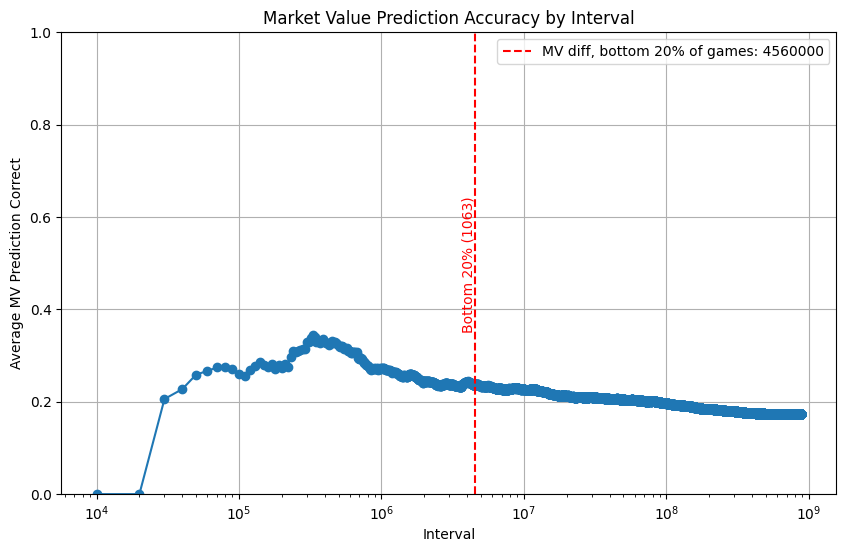

In [90]:
#for overall data - below
overall_data_plot_below_ints = plot_mv_predictions_inverted_below(overall_data_inverted_below)

In [110]:
def plot_competition_data_below_inverted(subset, competition_name, annotation_interval=20, secondary_annotation_interval=40):
    # Drop rows with NaN values in 'average_mv_prediction_correct'
    subset = subset.dropna(subset=['average_mv_prediction_correct'])
    
    # Modify the data for plotting
    subset['inverse_mv_prediction_correct'] = subset['average_mv_prediction_correct']
    
    plt.figure(figsize=(10, 6))
    
    # Create the plot
    plot = sns.lineplot(data=subset, x='interval', y='inverse_mv_prediction_correct', alpha=0.7)
    
    # Highlight vertical bars where Y value is at or above 0.25 (1 - 0.75)
    for _, row in subset.iterrows():
        if row['inverse_mv_prediction_correct'] <= 0.1:
            plt.axvspan(row['interval'] - 0.1, row['interval'] + 0.1, color='pink', alpha=0.3)
        # Highlight areas where Y value is below 0.7 (1 - 0.3)
        if row['inverse_mv_prediction_correct'] > 0.7:
            plt.axvspan(row['interval'] - 0.1, row['interval'] + 0.1, color='lightpink', alpha=0.5)
    
    # Add scatter plot with conditional coloring
    scatter = sns.scatterplot(
        data=subset, 
        x='interval', 
        y='inverse_mv_prediction_correct', 
        size='sample_size', 
        legend=False, 
        sizes=(20, 200),
        hue=subset['inverse_mv_prediction_correct'] <= 0.1,  # Conditional coloring
        palette={True: 'red', False: 'blue'}  # Colors for the condition
    )
    
    # Calculate the maximum sample size
    max_sample_size = subset['sample_size'].max()
    threshold_sample_size_low = 0.1 * max_sample_size  # 10% of the maximum sample size
    secondary_threshold_sample_size = 0.05 * max_sample_size  # 5% of the maximum sample size
    
    # Initialize the last annotated sample size and last annotated index
    last_annotation_index = -annotation_interval  # Ensure the first point can be annotated
    last_secondary_annotation_index = -secondary_annotation_interval  # For secondary threshold
    last_annotated_sample_size = None  # For tracking changes in sample size
    
    # Add text annotations for points where sample size is below 10% of the maximum
    for i, row in subset.iterrows():
        if row['sample_size'] < threshold_sample_size_low:
            if row['sample_size'] >= secondary_threshold_sample_size:
                # Annotate only if the sample size changes by at least 3
                if last_annotated_sample_size is None or abs(row['sample_size'] - last_annotated_sample_size) >= 3:
                    if i - last_secondary_annotation_index >= secondary_annotation_interval:
                        plt.text(row['interval'], row['inverse_mv_prediction_correct'] + 0.05, f'{int(row["sample_size"])}',
                                 horizontalalignment='center', size='small', color='black', weight='semibold', rotation=90)
                        last_secondary_annotation_index = i
                        last_annotated_sample_size = row['sample_size']
            else:
                if i - last_annotation_index >= annotation_interval:
                    plt.text(row['interval'], row['inverse_mv_prediction_correct'] + 0.05, f'{int(row["sample_size"])}',
                             horizontalalignment='center', size='small', color='black', weight='semibold', rotation=90)
                    last_annotation_index = i
    
    # Find the lowest X value
    min_x_value = subset['interval'].min()
    min_x_row = subset[subset['interval'] == min_x_value].iloc[0]
    min_x_y_value = min_x_row['inverse_mv_prediction_correct']
    
    # Add text annotation for the lowest X value, moved down and to the left
    plt.text(min_x_value, min_x_y_value - 0.05, f'Lowest X: {min_x_value}', 
             horizontalalignment='left', size='medium', color='red', weight='semibold')
    
    # Set X axis to a logarithmic scale
    plt.xscale('log')
    
    # Set Y axis limits
    plt.ylim(0, 1)
    
    # Add more Y axis ticks
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    # Add labels and title
    plt.title(f"% of matches won by the less valuable team by difference in market value, {competition_name}", pad=20, loc='left')
    plt.xlabel("Interval (log scale)")
    plt.ylabel("Percentage of Less Valuable Team Winning")
    
    # Use a minimal theme
    sns.despine()
    
    # Display the plot
    #plt.show()
    plt.savefig(f'/Users/finneganlaister-smith/Downloads/PLOTS % LESS VALUABLE TEAM WINS/BELOW INTERVALS/{keynum}.png')
    
    # Clear the current plot to free memory
    plt.clf()

In [113]:
#for each competition
number = 1
while number <= 13:
    number = number + 1
    keynum = list(competition_dfs.keys())[number]
    plot_competition_data_below_inverted(competition_dfs[keynum], keynum)

/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_76803/1402644222.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['inverse_mv_prediction_correct'] = subset['average_mv_prediction_correct']
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_76803/1402644222.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['inverse_mv_prediction_correct'] = subset['average_mv_prediction_correct']
/var/folders/vw/z2xv57_n70l_szw_fr80j5km0000gn/T/ipykernel_76803/1402644222.py:6: SettingWit

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>